In [1]:
import datetime
import random
import string
import pymysql

class Vehicle:
    def __init__(self, vehicle_number, vehicle_type, contact_number, ticket_number, entry_time, exit_time):
        self.vehicle_number = vehicle_number
        self.vehicle_type = vehicle_type
        self.contact_number = contact_number
        self.ticket_number = ticket_number
        self.entry_time = entry_time
        self.exit_time = exit_time
    
    def get_duration(self):
        return self.exit_time - self.entry_time
    
    def get_cost(self):
        duration = self.get_duration()
        total_hours = duration.total_seconds() / 3600
        total_cost = round(total_hours * 10, 2)
        return total_cost
    
    def print_receipt(self):
        total_cost = self.get_cost()
        
        print("--------------- Receipt ---------------")
        print(f"Vehicle Number: {self.vehicle_number}")
        print(f"Vehicle Type: {self.vehicle_type}")
        print(f"Contact Number: {self.contact_number}")
        print(f"Parking Ticket Number: {self.ticket_number}")
        print(f"Entry Time: {self.entry_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Exit Time: {self.exit_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Duration: {self.get_duration()}")
        print(f"Total Cost: {total_cost} USD")
        print("---------------------------------------")

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='@manasavijay1',
                             database='mydatabase')
cursor = connection.cursor()

# Get user input for vehicle details
vehicle_number = input("Enter vehicle number: ")

# Get user input for vehicle type
print("Select vehicle type:")
print("1. Bike")
print("2. Car")
print("3. Truck")
print("4. Physically disabled")
vehicle_type_choice = input("Enter choice (1-4): ")
vehicle_type_map = {"1": "Bike", "2": "Car", "3": "Truck", "4": "Physically disabled"}
vehicle_type = vehicle_type_map.get(vehicle_type_choice)

contact_number = input("Enter user contact number: ")

# Generate random ticket number
ticket_chars = string.ascii_uppercase + string.digits
ticket_number = ''.join(random.choice(ticket_chars) for _ in range(8))

entry_time_str = input("Enter entry time in YYYY-MM-DD HH:MM:SS format: ")
entry_time = datetime.datetime.strptime(entry_time_str, '%Y-%m-%d %H:%M:%S')
exit_time_str = input("Enter exit time in YYYY-MM-DD HH:MM:SS format: ")
exit_time = datetime.datetime.strptime(exit_time_str, '%Y-%m-%d %H:%M:%S')

# Create Vehicle object and print receipt
vehicle = Vehicle(vehicle_number, vehicle_type, contact_number, ticket_number, entry_time, exit_time)
vehicle.print_receipt()

# Insert parking record into the database
query = f"INSERT INTO parking_records (vehicle_number, vehicle_type, contact_number, ticket_number, entry_time, exit_time) VALUES ('{vehicle_number}', '{vehicle_type}', '{contact_number}', '{ticket_number}', '{entry_time}', '{exit_time}')"
cursor.execute(query)
connection.commit()

# Close the database connection
connection.close()


Enter vehicle number: ts103
Select vehicle type:
1. Bike
2. Car
3. Truck
4. Physically disabled
Enter choice (1-4): 1
Enter user contact number: 99841324
Enter entry time in YYYY-MM-DD HH:MM:SS format: 2023-04-23 22:15:00
Enter exit time in YYYY-MM-DD HH:MM:SS format: 2023-04-23 23:15:00
--------------- Receipt ---------------
Vehicle Number: ts103
Vehicle Type: Bike
Contact Number: 99841324
Parking Ticket Number: MAPMCIH0
Entry Time: 2023-04-23 22:15:00
Exit Time: 2023-04-23 23:15:00
Duration: 1:00:00
Total Cost: 10.0 USD
---------------------------------------


In [4]:
pip install mysql-connector-python


     ------------------------------------- 904.0/904.0 kB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import mysql.connector

# establish database connection
db_connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="@manasavijay1",
  database="mydatabase"
)

# create cursor object to execute SQL queries
cursor = db_connection.cursor()

# execute a SELECT query
cursor.execute("SELECT * FROM parking_records;")

# fetch all rows returned by the query
result_set = cursor.fetchall()

# iterate over the result set and print each row
for row in result_set:
  print(row)

# close cursor and database connection
cursor.close()
db_connection.close()


('ABC123', 'Car', '9876543210', 'A1B2C3D4', '2022-01-01 09:00:00', '2022-01-01 10:30:00', 15.0)
('DEF456', 'Bike', '1234567890', 'E5F6G7H8', '2022-01-01 10:00:00', '2022-01-01 11:30:00', 10.0)
('GHI789', 'Truck', '9999999999', 'I9J8K7L6', '2022-01-01 11:00:00', '2022-01-01 13:30:00', 30.0)
('JKL012', 'Physically disabled', '1111111111', 'M0N1O2P3', '2022-01-01 12:00:00', '2022-01-01 14:30:00', 20.0)
('MNO345', 'Car', '2222222222', 'Q4R5S6T7', '2022-01-01 13:00:00', '2022-01-01 15:30:00', 20.0)
('PQR678', 'Bike', '3333333333', 'U8V9W0X1', '2022-01-01 14:00:00', '2022-01-01 16:30:00', 15.0)
('STU901', 'Truck', '4444444444', 'Y2Z3A4B5', '2022-01-01 15:00:00', '2022-01-01 18:30:00', 45.0)
('VWX234', 'Physically disabled', '5555555555', 'C6D7E8F9', '2022-01-01 16:00:00', '2022-01-01 19:30:00', 30.0)
('YZA567', 'Car', '6666666666', 'G0H1I2J3', '2022-01-01 17:00:00', '2022-01-01 20:30:00', 30.0)
('BCD890', 'Bike', '7777777777', 'K4L5M6N7', '2022-01-01 18:00:00', '2022-01-01 21:30:00', 25.0)
(

In [4]:
import pymysql
import pandas as pd

# Set up a connection to the MySQL database
conn = pymysql.connect(host='localhost',
                       user='root',
                       password='@manasavijay1',
                       db='mydatabase')

# Query the database and load the result into a Pandas DataFrame
query = 'SELECT * FROM parking_records'
df = pd.read_sql(query, con=conn)

# Print the first few rows of the DataFrame
print(df.head())


  vehicle_number         vehicle_type contact_number ticket_number  \
0         ABC123                  Car     9876543210      A1B2C3D4   
1         DEF456                 Bike     1234567890      E5F6G7H8   
2         GHI789                Truck     9999999999      I9J8K7L6   
3         JKL012  Physically disabled     1111111111      M0N1O2P3   
4         MNO345                  Car     2222222222      Q4R5S6T7   

            entry_time            exit_time  total_cost  
0  2022-01-01 09:00:00  2022-01-01 10:30:00        15.0  
1  2022-01-01 10:00:00  2022-01-01 11:30:00        10.0  
2  2022-01-01 11:00:00  2022-01-01 13:30:00        30.0  
3  2022-01-01 12:00:00  2022-01-01 14:30:00        20.0  
4  2022-01-01 13:00:00  2022-01-01 15:30:00        20.0  


C:\Users\User\AppData\Local\Temp\ipykernel_9588\2459967778.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
data = pd.read_csv("output.csv")

In [7]:
data

,vehicle_number,vehicle_type,contact_number,ticket_number,entry_time,exit_time,total_cost
0,ABC123,Car,9876543210,A1B2C3D4,2022-01-01 09:00:00,2022-01-01 10:30:00,15.0
1,DEF456,Bike,1234567890,E5F6G7H8,2022-01-01 10:00:00,2022-01-01 11:30:00,10.0
2,GHI789,Truck,9999999999,I9J8K7L6,2022-01-01 11:00:00,2022-01-01 13:30:00,30.0
3,JKL012,Physically disabled,1111111111,M0N1O2P3,2022-01-01 12:00:00,2022-01-01 14:30:00,20.0
4,MNO345,Car,2222222222,Q4R5S6T7,2022-01-01 13:00:00,2022-01-01 15:30:00,20.0
5,PQR678,Bike,3333333333,U8V9W0X1,2022-01-01 14:00:00,2022-01-01 16:30:00,15.0
6,STU901,Truck,4444444444,Y2Z3A4B5,2022-01-01 15:00:00,2022-01-01 18:30:00,45.0
7,VWX234,Physically disabled,5555555555,C6D7E8F9,2022-01-01 16:00:00,2022-01-01 19:30:00,30.0
8,YZA567,Car,6666666666,G0H1I2J3,2022-01-01 17:00:00,2022-01-01 20:30:00,30.0
9,BCD890,Bike,7777777777,K4L5M6N7,2022-01-01 18:00:00,2022-01-01 21:30:00,25.0


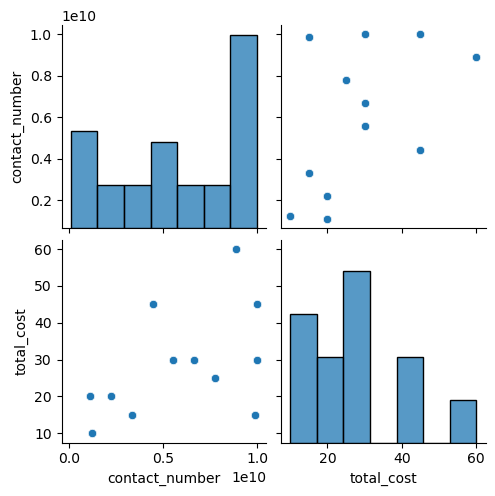

In [8]:
sns.pairplot(data)

In [9]:
data.shape

(51, 7)

In [10]:
print('features of data set :',data.columns)

features of data set : Index(['vehicle_number', 'vehicle_type', 'contact_number', 'ticket_number',
       'entry_time', 'exit_time', 'total_cost'],
      dtype='object')


In [11]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25    False
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38    False
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
dtype: bool

In [12]:
data.isnull().sum()

vehicle_number    0
vehicle_type      0
contact_number    0
ticket_number     0
entry_time        0
exit_time         0
total_cost        3
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data

,vehicle_number,vehicle_type,contact_number,ticket_number,entry_time,exit_time,total_cost
0,ABC123,Car,9876543210,A1B2C3D4,2022-01-01 09:00:00,2022-01-01 10:30:00,15.0
1,DEF456,Bike,1234567890,E5F6G7H8,2022-01-01 10:00:00,2022-01-01 11:30:00,10.0
2,GHI789,Truck,9999999999,I9J8K7L6,2022-01-01 11:00:00,2022-01-01 13:30:00,30.0
3,JKL012,Physically disabled,1111111111,M0N1O2P3,2022-01-01 12:00:00,2022-01-01 14:30:00,20.0
4,MNO345,Car,2222222222,Q4R5S6T7,2022-01-01 13:00:00,2022-01-01 15:30:00,20.0
5,PQR678,Bike,3333333333,U8V9W0X1,2022-01-01 14:00:00,2022-01-01 16:30:00,15.0
6,STU901,Truck,4444444444,Y2Z3A4B5,2022-01-01 15:00:00,2022-01-01 18:30:00,45.0
7,VWX234,Physically disabled,5555555555,C6D7E8F9,2022-01-01 16:00:00,2022-01-01 19:30:00,30.0
8,YZA567,Car,6666666666,G0H1I2J3,2022-01-01 17:00:00,2022-01-01 20:30:00,30.0
9,BCD890,Bike,7777777777,K4L5M6N7,2022-01-01 18:00:00,2022-01-01 21:30:00,25.0


In [15]:
data.dtypes

vehicle_number     object
vehicle_type       object
contact_number      int64
ticket_number      object
entry_time         object
exit_time          object
total_cost        float64
dtype: object

In [16]:
data.head(10)

,vehicle_number,vehicle_type,contact_number,ticket_number,entry_time,exit_time,total_cost
0,ABC123,Car,9876543210,A1B2C3D4,2022-01-01 09:00:00,2022-01-01 10:30:00,15.0
1,DEF456,Bike,1234567890,E5F6G7H8,2022-01-01 10:00:00,2022-01-01 11:30:00,10.0
2,GHI789,Truck,9999999999,I9J8K7L6,2022-01-01 11:00:00,2022-01-01 13:30:00,30.0
3,JKL012,Physically disabled,1111111111,M0N1O2P3,2022-01-01 12:00:00,2022-01-01 14:30:00,20.0
4,MNO345,Car,2222222222,Q4R5S6T7,2022-01-01 13:00:00,2022-01-01 15:30:00,20.0
5,PQR678,Bike,3333333333,U8V9W0X1,2022-01-01 14:00:00,2022-01-01 16:30:00,15.0
6,STU901,Truck,4444444444,Y2Z3A4B5,2022-01-01 15:00:00,2022-01-01 18:30:00,45.0
7,VWX234,Physically disabled,5555555555,C6D7E8F9,2022-01-01 16:00:00,2022-01-01 19:30:00,30.0
8,YZA567,Car,6666666666,G0H1I2J3,2022-01-01 17:00:00,2022-01-01 20:30:00,30.0
9,BCD890,Bike,7777777777,K4L5M6N7,2022-01-01 18:00:00,2022-01-01 21:30:00,25.0


In [17]:
data.tail(10)

,vehicle_number,vehicle_type,contact_number,ticket_number,entry_time,exit_time,total_cost
41,GHI789,Truck,9999999999,I9J8K7L6,2022-01-01 11:00:00,2022-01-01 13:30:00,30.0
42,JKL012,Physically disabled,1111111111,M0N1O2P3,2022-01-01 12:00:00,2022-01-01 14:30:00,20.0
43,MNO345,Car,2222222222,Q4R5S6T7,2022-01-01 13:00:00,2022-01-01 15:30:00,20.0
44,PQR678,Bike,3333333333,U8V9W0X1,2022-01-01 14:00:00,2022-01-01 16:30:00,15.0
45,STU901,Truck,4444444444,Y2Z3A4B5,2022-01-01 15:00:00,2022-01-01 18:30:00,45.0
46,VWX234,Physically disabled,5555555555,C6D7E8F9,2022-01-01 16:00:00,2022-01-01 19:30:00,30.0
47,YZA567,Car,6666666666,G0H1I2J3,2022-01-01 17:00:00,2022-01-01 20:30:00,30.0
48,BCD890,Bike,7777777777,K4L5M6N7,2022-01-01 18:00:00,2022-01-01 21:30:00,25.0
49,EFG123,Truck,8888888888,O8P9Q0R1,2022-01-01 19:00:00,2022-01-01 23:30:00,60.0
50,HIJ456,Physically disabled,9999999999,S2T3U4V5,2022-01-01 20:00:00,2022-01-02 01:30:00,45.0


In [18]:
data.value_counts()

vehicle_number  vehicle_type         contact_number  ticket_number  entry_time           exit_time            total_cost
ABC123          Car                  9876543210      A1B2C3D4       2022-01-01 09:00:00  2022-01-01 10:30:00  15.0          4
BCD890          Bike                 7777777777      K4L5M6N7       2022-01-01 18:00:00  2022-01-01 21:30:00  25.0          4
DEF456          Bike                 1234567890      E5F6G7H8       2022-01-01 10:00:00  2022-01-01 11:30:00  10.0          4
EFG123          Truck                8888888888      O8P9Q0R1       2022-01-01 19:00:00  2022-01-01 23:30:00  60.0          4
GHI789          Truck                9999999999      I9J8K7L6       2022-01-01 11:00:00  2022-01-01 13:30:00  30.0          4
HIJ456          Physically disabled  9999999999      S2T3U4V5       2022-01-01 20:00:00  2022-01-02 01:30:00  45.0          4
JKL012          Physically disabled  1111111111      M0N1O2P3       2022-01-01 12:00:00  2022-01-01 14:30:00  20.0         

C:\Users\User\AppData\Local\Temp\ipykernel_9588\862118016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


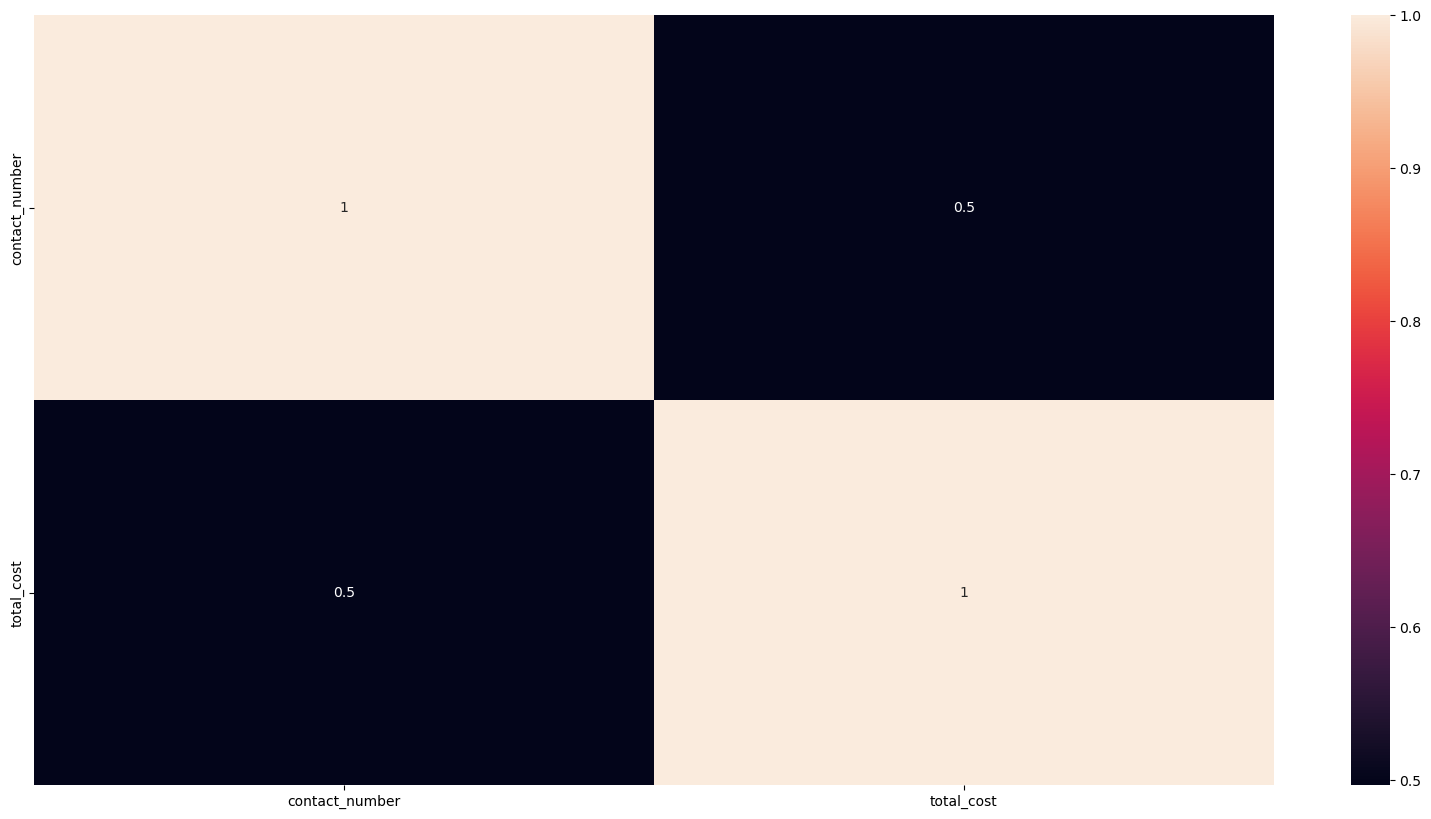

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

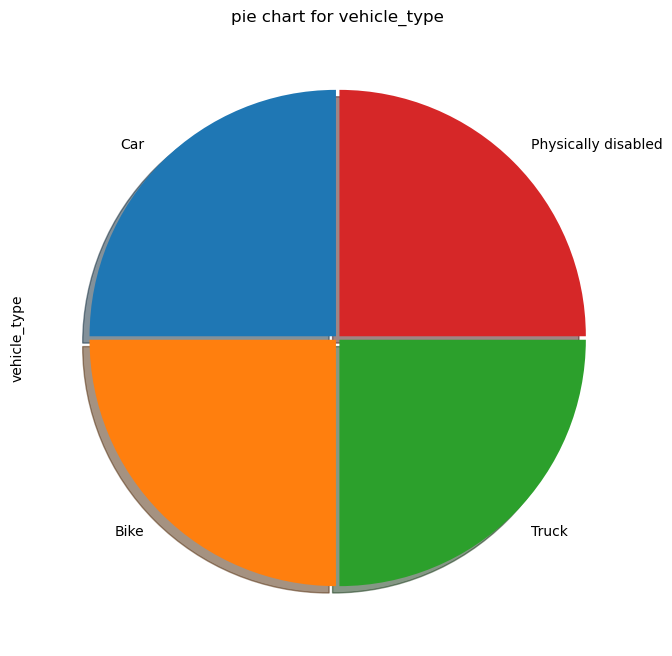

In [20]:
#pie chart to analysis to vehical types
data['vehicle_type'].value_counts().plot.pie(explode=[0.01,0.01,0.01,0.01],startangle=90,shadow=True,figsize=(8,8))
plt.title('pie chart for vehicle_type')
plt.show()

<Axes: >

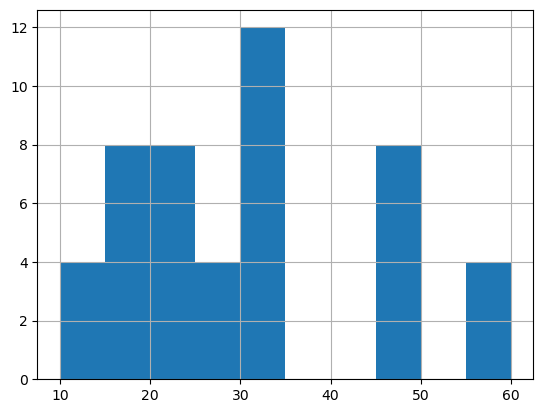

In [21]:
#histogram for total cost
data['total_cost'].hist()  

<Axes: >

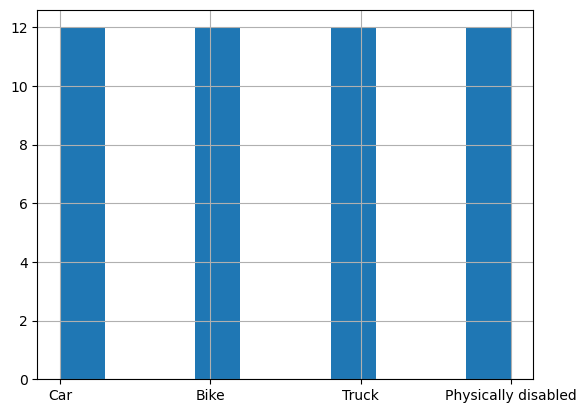

In [22]:
data['vehicle_type'].hist() 